### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
data = boston.data

In [4]:
target = boston.target

In [5]:
feature_names = boston.feature_names

In [6]:
X = pd.DataFrame(data, columns=feature_names)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
y = pd.DataFrame(target, columns=['price'])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [16]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [17]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [19]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [20]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [21]:
X_train_tsne.shape

(404, 2)

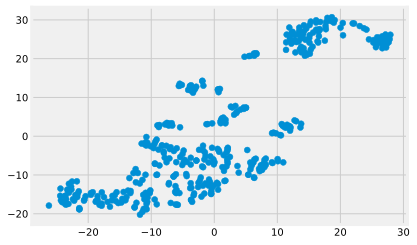

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

In [23]:
from sklearn.cluster import KMeans

In [24]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [25]:
X_train_labels = model.fit_predict(X_train)

In [26]:
X_train_labels

array([1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

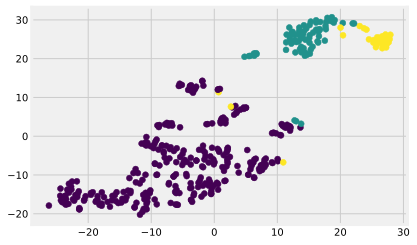

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)

In [28]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [29]:
y_train.head()

,price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2


In [30]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [31]:
model.cluster_centers_

array([[ 4.04862828e-01,  1.57373737e+01,  8.34653199e+00,
         6.73400673e-02,  5.13783165e-01,  6.41719529e+00,
         6.11915825e+01,  4.44303199e+00,  4.47474747e+00,
         3.11919192e+02,  1.76760943e+01,  3.82707172e+02,
         1.03197643e+01],
       [ 1.17456618e+01, -3.55271368e-15,  1.84805263e+01,
         1.05263158e-01,  6.75750000e-01,  5.99338158e+00,
         8.90907895e+01,  2.06063684e+00,  2.32105263e+01,
         6.67776316e+02,  2.01960526e+01,  3.73692895e+02,
         1.79701316e+01],
       [ 1.43603803e+01, -3.55271368e-15,  1.78877419e+01,
         3.22580645e-02,  6.73193548e-01,  6.13600000e+00,
         8.87741935e+01,  2.01038387e+00,  2.21612903e+01,
         6.39935484e+02,  1.98677419e+01,  6.03793548e+01,
         1.94216129e+01]])

Определим средние значения цены по кластерам

In [32]:
price_grouped = y_train['price'].groupby(X_train_labels)

In [33]:
price_grouped.get_group(0).mean(), price_grouped.get_group(1).mean(), price_grouped.get_group(2).mean()

(25.168686868686873, 17.4421052631579, 13.196774193548386)

Определим средние значения CRIM по кластерам

In [34]:
crim_grouped = X_train['CRIM'].groupby(X_train_labels)

In [35]:
crim_grouped.get_group(0).mean(), crim_grouped.get_group(1).mean(), crim_grouped.get_group(2).mean()

(0.40486282828282844, 11.745661842105266, 14.360380322580648)

Эти значения равны значениям из model.cluster_centers_

In [36]:
model.cluster_centers_[:, 0]

array([ 0.40486283, 11.74566184, 14.36038032])

### Задание 3

In [37]:
X_test_labels = model.predict(X_test)

In [38]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

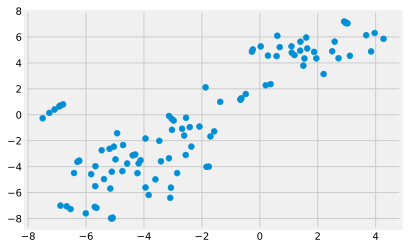

In [39]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1])

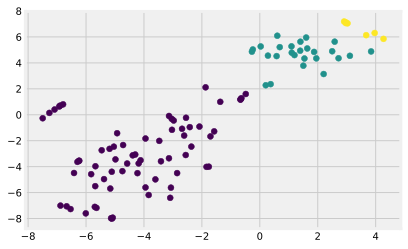

In [40]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=X_test_labels)

In [41]:
model.cluster_centers_

array([[ 4.04862828e-01,  1.57373737e+01,  8.34653199e+00,
         6.73400673e-02,  5.13783165e-01,  6.41719529e+00,
         6.11915825e+01,  4.44303199e+00,  4.47474747e+00,
         3.11919192e+02,  1.76760943e+01,  3.82707172e+02,
         1.03197643e+01],
       [ 1.17456618e+01, -3.55271368e-15,  1.84805263e+01,
         1.05263158e-01,  6.75750000e-01,  5.99338158e+00,
         8.90907895e+01,  2.06063684e+00,  2.32105263e+01,
         6.67776316e+02,  2.01960526e+01,  3.73692895e+02,
         1.79701316e+01],
       [ 1.43603803e+01, -3.55271368e-15,  1.78877419e+01,
         3.22580645e-02,  6.73193548e-01,  6.13600000e+00,
         8.87741935e+01,  2.01038387e+00,  2.21612903e+01,
         6.39935484e+02,  1.98677419e+01,  6.03793548e+01,
         1.94216129e+01]])

In [42]:
X_test_labels

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0], dtype=int32)

Определим средние значения цены по кластерам

In [43]:
price_grouped = y_test['price'].groupby(X_test_labels)
price_grouped.get_group(0).mean(), price_grouped.get_group(1).mean(), price_grouped.get_group(2).mean()

(23.911594202898552, 17.39230769230769, 12.814285714285713)

Определим средние значения CRIM по кластерам

In [44]:
crim_grouped = X_test['CRIM'].groupby(X_test_labels)
crim_grouped.get_group(0).mean(), crim_grouped.get_group(1).mean(), crim_grouped.get_group(2).mean()

(0.2464211594202899, 8.469301923076923, 19.021665714285714)

Данные по средним значениям не совпадают, так как центры кластеров остались из предыдущих данных